In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")

Shape of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of x_test  (10000, 28, 28)
Shape of y_test  (10000,)


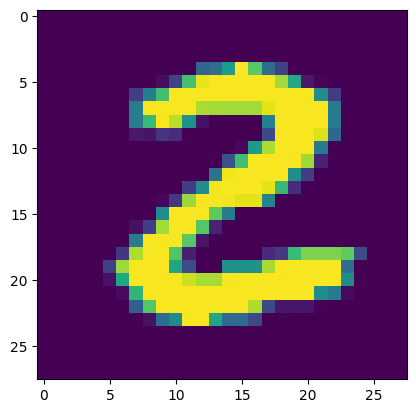

2


In [7]:
plt.imshow(x_train[25])
plt.show()
print(y_train[25])

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu',name='L1'),
    keras.layers.Dense(50,activation='relu',name='L2'),
    keras.layers.Dense(10,activation='softmax',name='L3')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer="sgd",loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train,
              batch_size=30,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6854 - loss: 1.1095 - val_accuracy: 0.9044 - val_loss: 0.3325
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9064 - loss: 0.3222 - val_accuracy: 0.9229 - val_loss: 0.2701
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9254 - loss: 0.2608 - val_accuracy: 0.9313 - val_loss: 0.2293
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9342 - loss: 0.2312 - val_accuracy: 0.9387 - val_loss: 0.2042
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9428 - loss: 0.2011 - val_accuracy: 0.9441 - val_loss: 0.1849
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9464 - loss: 0.1868 - val_accuracy: 0.9487 - val_loss: 0.1708
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9531 - loss: 0.1655 - val_accuracy: 0.9518 - val_loss: 0.1613
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9562 - loss: 0.1516 -

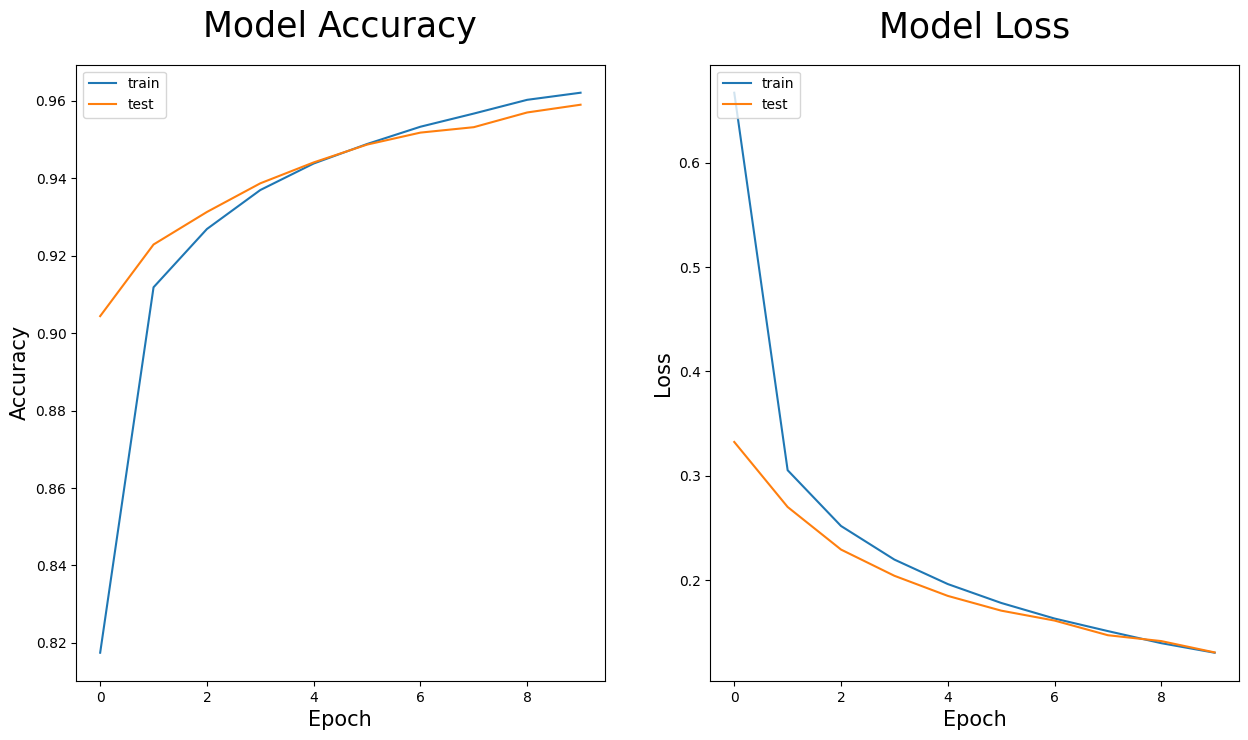

In [13]:
import seaborn as sns
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')



plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9512 - loss: 0.1532


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


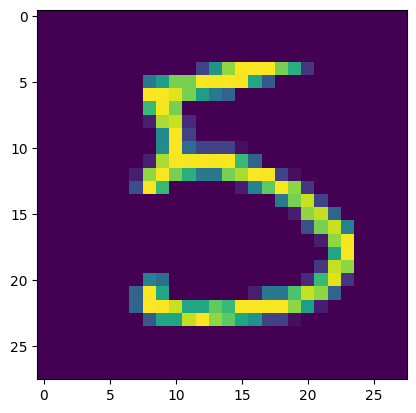

5


In [15]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[15])
plt.show()
print(np.argmax(predicted_value[15], axis=0))